# Random Forest Classifier

First, the necissery pips are imported

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

The CSV file is imported and the data is read

In [174]:
#Importing and reading the csv file
df = pd.read_csv('ai4i2020.csv')

The unnecessary data are dropped from the data. The remaining data are shown afterwards.

In [175]:
#Dropping data
df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)

#Printing the remaining data
df.head() 

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


The correlation between the data and machine failure are executed below 

In [176]:
corr_matrix = df.corr()
corr_matrix['Machine failure'].sort_values(ascending=False)

Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64

Before setting up the model, the features of the data are shown. For this, the data for Machine Failure are dropped and a decription of the features for the remaining data are printed. 

In [177]:
#Dropping Machine failure from the data.
features = df.drop(['Machine failure'], axis=1)

#Printing the features of the remaining data. 
features.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


The Model starts with defying the x and y data for the model:
x data are the ones the model will train upon
y data are the target
 

In [178]:
#The x data are defined by dropping machine failure data.
x = df.drop(['Machine failure'], axis=1)

#The y data are the target which is Machine failure data
y = df['Machine failure']

The Data will be normilzed by scaling it as shown below

In [179]:
#Type of scaling determined

scaler = Normalizer()

#executing scaling command on x data
x_scaled = scaler.fit_transform(x)

The Data are now split to prepare for training the model

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

The random forest model are defined and trained upon the split data. Then preduction is made. 

In [181]:
#The random forest model is defined
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

#Training the model with the defined data from earlier
rf_model.fit(X_train, y_train)

#The model prediction is executed hereunder.
y_pred = rf_model.predict(X_test)

The preformance of the model is evaluated by looking at the classification report, accuracy score and the confusion matrix.


In [182]:
#Printing the classification report and accuracy
print("\nEvaluating the Model...")
y_pred = rf_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Evaluating the Model...

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.87      0.66      0.75        68

    accuracy                           0.98      2000
   macro avg       0.93      0.83      0.87      2000
weighted avg       0.98      0.98      0.98      2000


Accuracy Score:
0.985


Plotting the confusion matrix

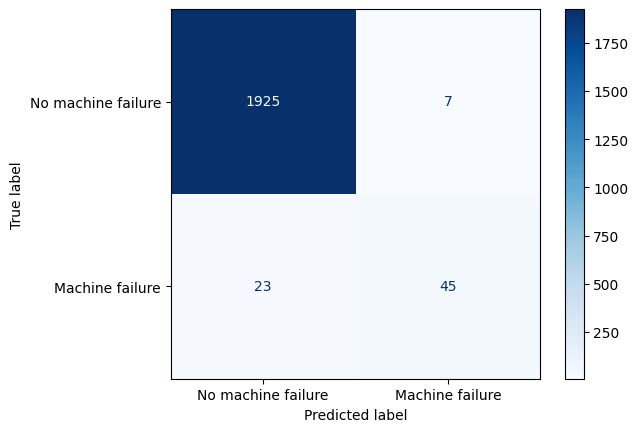

In [183]:
#Plotting the confusion matrix
sns.reset_orig()
y_predicted = rf_model.predict(X_test) >= 1
labels = ['No machine failure','Machine failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='horizontal')
plt.show()

Lastly the importance of each feature are printed below:

In [184]:
print("\nFeature Importances:")
importances = pd.Series(rf_model.feature_importances_, index=df.columns[:-1])
print(importances.sort_values(ascending=False))


Feature Importances:
Torque [Nm]                0.337769
Rotational speed [rpm]     0.216715
Tool wear [min]            0.164251
Air temperature [K]        0.142722
Process temperature [K]    0.138542
dtype: float64
